In [27]:
!pip install statsmodels



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

1. Understanding Time Series Data

In [29]:
df = pd.read_csv("C:\\Users\\youse\\Desktop\\ML PROJECT INDIA\\Sales\\Super_Store_data.csv", encoding='latin1')

In [30]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [31]:
max_sales = df['Sales'].max()
min_sales = df['Sales'].min()
avg_sales = df['Sales'].mean()

print('Maximum Sales:', max_sales)
print('Minimum Sales:', min_sales)
print('Average Sales:', avg_sales)

Maximum Sales: 4416.174
Minimum Sales: 1.892
Average Sales: 349.8348869872702


In [32]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [33]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [34]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


2. Checking Components of Time Series:

In [35]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


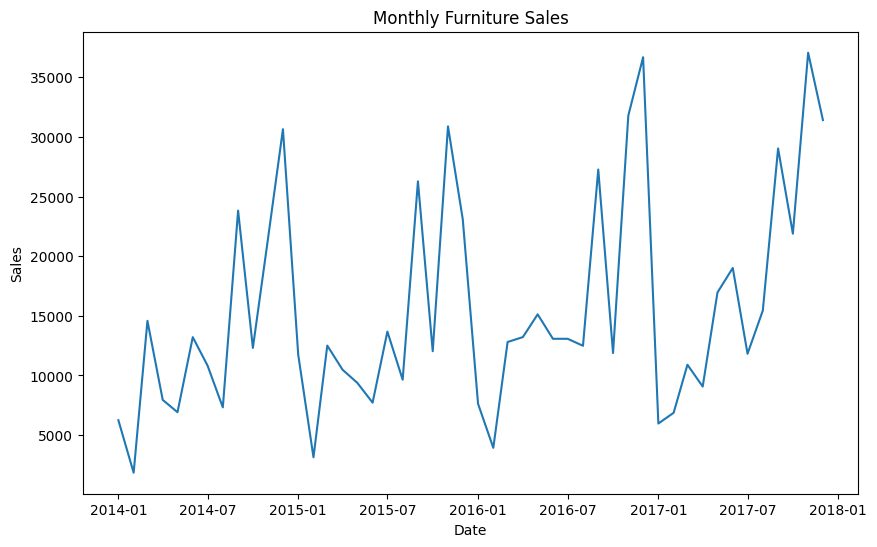

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('MS').sum()
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Furniture Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


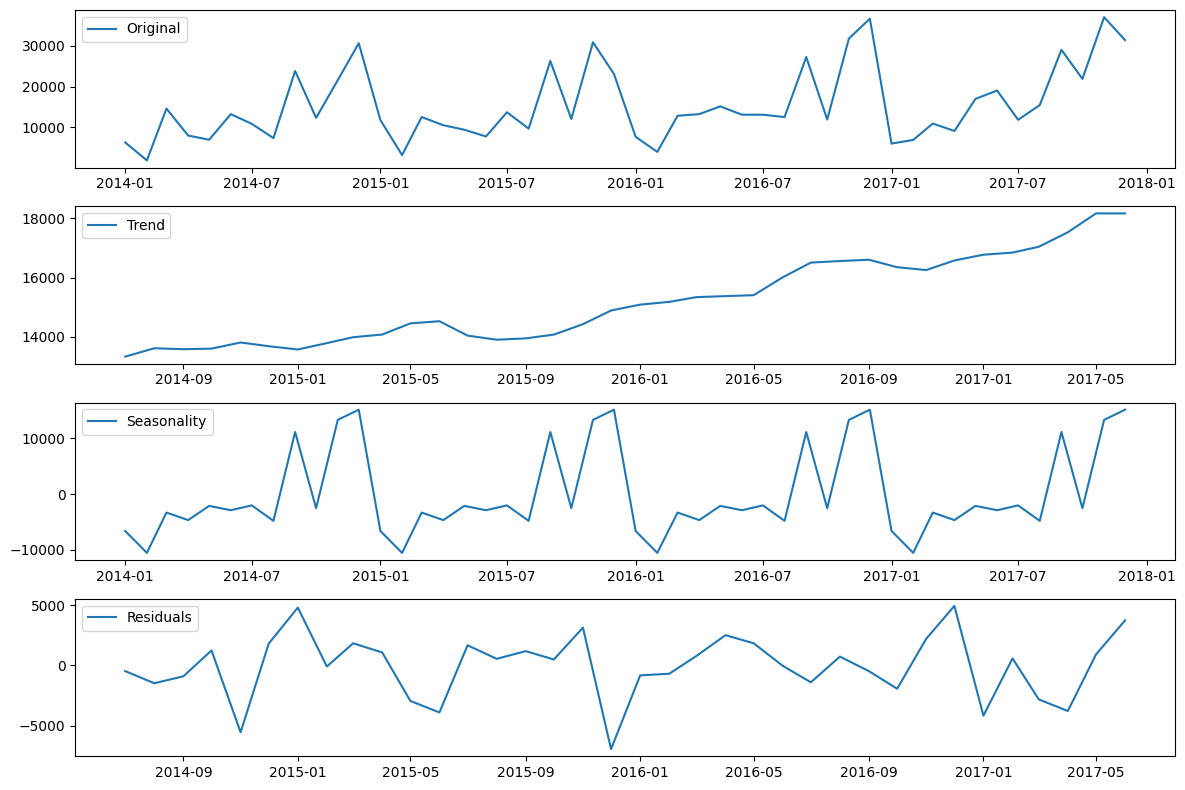

In [37]:
# Decompose the time series data to understand its components
decomposition = seasonal_decompose(monthly_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [38]:
print("Trend: This is the long-term underlying movement of the data. In the example you sent, the trend is increasing.")
print("Seasonality: This is the cyclical pattern in the data that repeats over a period of time. In this example, there is a seasonal pattern with peaks in the summer months.")
print("Residuals: This is the random variation in the data that cannot be explained by the trend or seasonality")

Trend: This is the long-term underlying movement of the data. In the example you sent, the trend is increasing.
Seasonality: This is the cyclical pattern in the data that repeats over a period of time. In this example, there is a seasonal pattern with peaks in the summer months.
Residuals: This is the random variation in the data that cannot be explained by the trend or seasonality


3. Forecasting Techniques:

In [39]:
df = pd.read_csv("C:\\Users\\youse\\Desktop\\ML PROJECT INDIA\\Sales\\Super_Store_data.csv", encoding='latin1')

In [40]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [41]:
df = pd.read_csv("C:\\Users\\youse\\Desktop\\ML PROJECT INDIA\\Sales\\Super_Store_data.csv", encoding='latin1')
# Convert 'Order Date' to datetime and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

monthly_sales = df['Sales'].resample('MS').sum()


model = ExponentialSmoothing(monthly_sales, seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit()

forecast = model_fit.forecast(12)

mse = mean_squared_error(monthly_sales[-12:], forecast)
print('Mean Squared Error (MSE):', mse)

r2 = r2_score(monthly_sales[-12:], forecast)
print('R-squared error:', r2)

Mean Squared Error (MSE): 16446264.599004693
R-squared error: 0.8246767222714929


c:\Users\youse\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


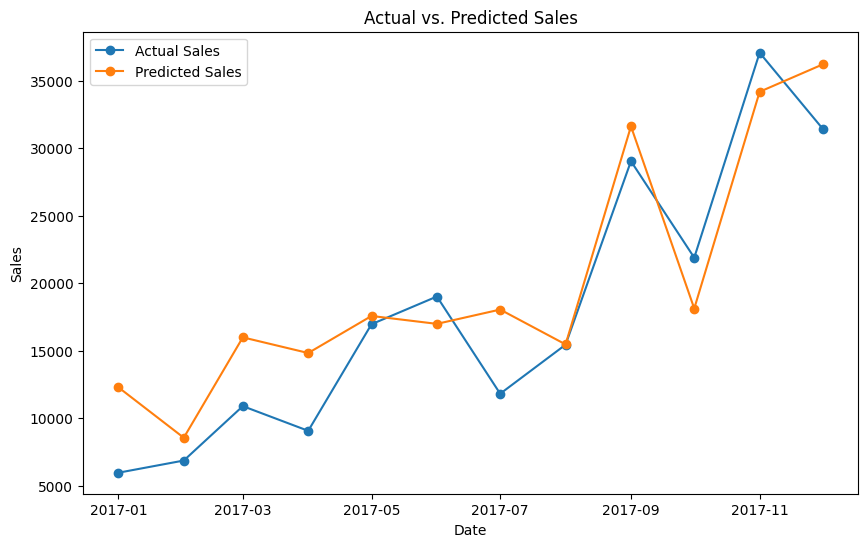

In [42]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index[-12:], monthly_sales[-12:], label='Actual Sales', marker='o')
plt.plot(monthly_sales.index[-12:], forecast, label='Predicted Sales', marker='o')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

4. Visualization in Time Series:

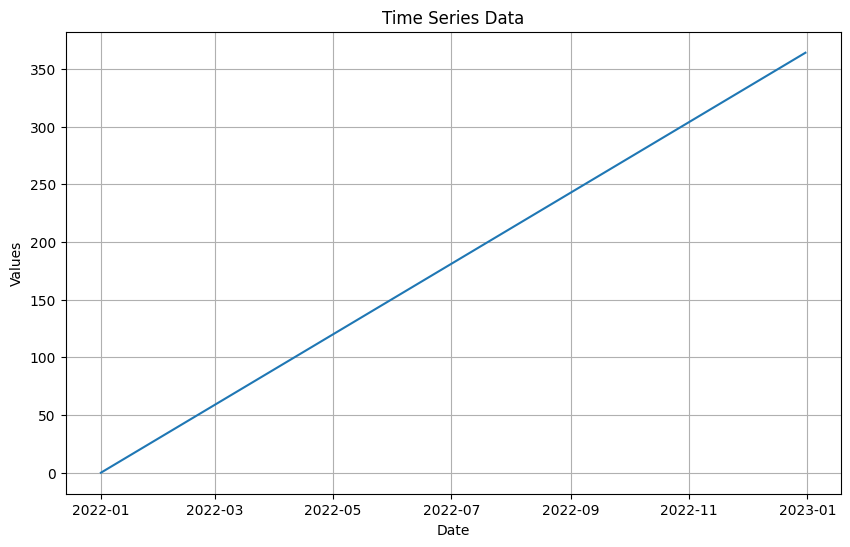

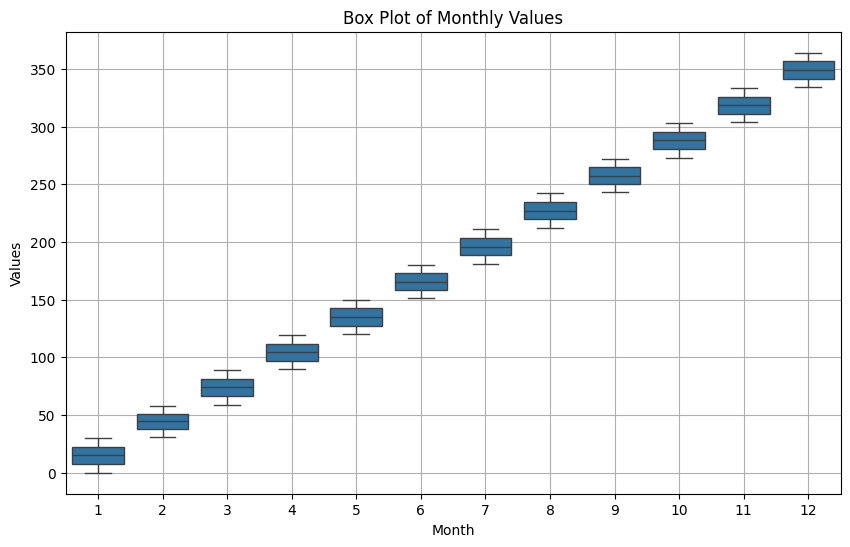

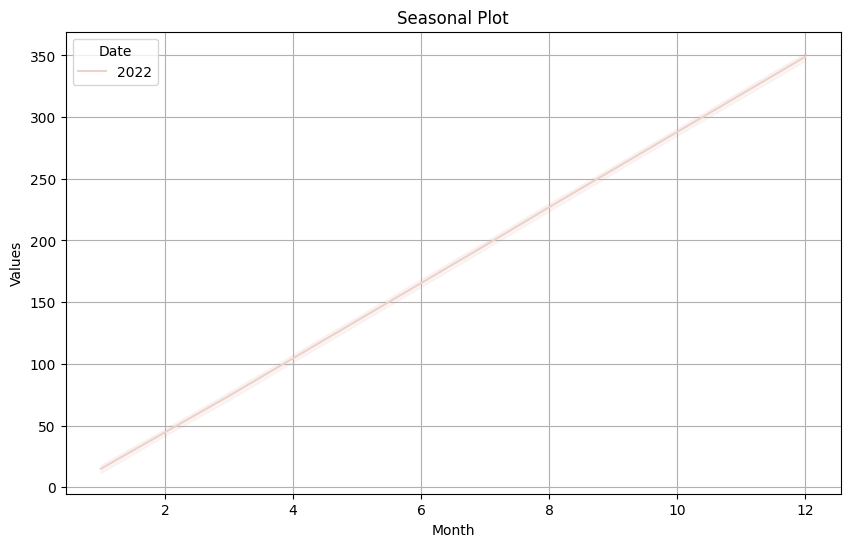

In [43]:
dates = pd.date_range(start='2022-01-01', periods=365)
values = pd.Series(range(365))


df = pd.DataFrame({'Date': dates, 'Values': values})

#line plot
# We use a line plot to visualize the overall trend of the time series data over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Values')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Box plot
# We use a box plot to visualize the distribution of values for each month, which can help identify seasonal patterns.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Date'].dt.month, y='Values')
plt.title('Box Plot of Monthly Values')
plt.xlabel('Month')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Seasonal plot
# We use a seasonal plot to visualize the seasonal variation in the time series data by plotting the values for each month across different years.
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df['Date'].dt.month, y='Values', hue=df['Date'].dt.year)
plt.title('Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Values')
plt.grid(True)
plt.show()